## Προγραμματισμός με τη γλώσσα python
### Alexandros Kanterakis [kantale@ics.forth.gr](mailto:kantale@ics.forth.gr)

### Διάλεξη 9η, Τρίτη 10 Δεκεμβρίου 2019

Το [pandas](http://pandas.pydata.org/) είναι μία βιβλιοθήκη σε python για ανάλυση δεδομένων. Υιοθετεί τη φιλοσοφία της Matlab και R για οργάνωση 2-διάστατων δεδομένων σε μία ειδική δομή που ονομάζεται data frame. Στη βιοπληροφορική το pandas συνήθως είναι χρήσιμο για να κάνοθμε εργασίες που συνήθως γίνονται με το excel. Τα πλεονεκτήματα του pandas είναι:

* Πάρα πολύ γρήγορο. Είναι υλοποιημένο σε C (η python "τρέχει" από πάνω) και έχει πολύ καλή απόδοση για πίνακες που έχουν μέχρι και εκατομύτια από γραμμές.
* Παρέχει ένα interface το οποίο προσομοιάζει τις βάσεις δεδομένων. Με αυτόν τον τρόπο μπορούμε να γράφουμε σύντομες εκφράσεις που κάνουν πολύπλοκες διεργασίες.
* Υποστηρίζεται από τρίτες βιβλιοθήκες για visualization, Machine Learning (π.χ. [sci-kit](http://scikit-learn.org/stable/)) και στατιστική (π.χ. [statmodels](http://statsmodels.sourceforge.net/)).
* Παρέχει δικές του μεθόδους για γρήγορο plotting και στατιστική ανάλυση
* Εύκολη και γρήγορο input / output σε διάφορα formats (excel included)

Συνήθως κάνουμε import το pandas ως εξής:

In [1]:
import pandas as pd

Αν δεν υπάρχει εγκαταστημένων τότε μπορείτε να το εγκαταστείσετε ως εξής:

```bash
pip install pandas
```

Προσοχή. Πρέπει το ```pip``` να βρίσκεται στην ίδια τοποθεσία που βρίσκεται και η python

Για τη παρούσα διάλεξη θα χρησιμοποιήσουμε έναν κατάλογο από [GWA studies](https://en.wikipedia.org/wiki/Genome-wide_association_study). O κατάλογος βρίσκεται σε αυτό το link: https://www.ebi.ac.uk/gwas/api/search/downloads/full για να το κατεβάσετε τοπικά τρέξτε:

In [4]:
!wget -O gwas.tsv  "https://www.ebi.ac.uk/gwas/api/search/downloads/full"

--2016-12-15 14:50:41--  https://www.ebi.ac.uk/gwas/api/search/downloads/full
Resolving www.ebi.ac.uk... 193.62.193.80
Connecting to www.ebi.ac.uk|193.62.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tsv]
Saving to: ‘gwas.tsv’

gwas.tsv                [          <=>       ]  17.93M  3.90MB/s    in 5.3s    

2016-12-15 14:50:47 (3.36 MB/s) - ‘gwas.tsv’ saved [18796575]



Η παραπάνω εντολή σώζει τον κατάλογο στο αρχείο: ```gwas.tsv```

Για να το φορτώσουμε τρέχουμε:

In [3]:
gwas = pd.read_csv('gwas.tsv', sep='\t')

/Users/alexandroskanterakis/anaconda3/envs/arkalos/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Για να τυπώσουμε μία σύνοψη (πρώτες και τελευταίες γραμμές) των δεδομένων τρέχουμε: 

In [4]:
gwas

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2009-09-28,18403759,Ober C,2008-04-09,N Engl J Med,www.ncbi.nlm.nih.gov/pubmed/18403759,Effect of variation in CHI3L1 on serum YKL-40 ...,YKL-40 levels,632 Hutterite individuals,"443 European ancestry cases, 491 European ance...",...,upstream_gene_variant,0.0,0.29,1e-13,13.000000,NaN,0.300000,[NR] ng/ml decrease,Affymetrix [290325],N
1,2008-06-16,18369459,Liu Y,2008-04-04,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18369459,A genome-wide association study of psoriasis a...,Psoriasis,"218 European ancestry cases, 519 European ance...","1,153 European ancestry cases, 1,217 European ...",...,intron_variant,0.0,0.65,2e-06,5.698970,NaN,1.410000,[1.22-1.61],Illumina [305983],N
2,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,intron_variant,0.0,NR,3e-18,17.522879,NaN,1.300000,[1.15-1.47],Illumina [317498],N
3,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,downstream_gene_variant,1.0,NR,7e-06,5.154902,NaN,1.220000,[1.10-1.35],Illumina [317498],N
4,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,intron_variant,0.0,NR,8e-06,5.096910,NaN,1.160000,[1.05-1.28],Illumina [317498],N
5,2008-06-16,18385738,Hung RJ,2008-04-03,Nature,www.ncbi.nlm.nih.gov/pubmed/18385738,A susceptibility locus for lung cancer maps to...,Lung cancer,"1,926 European ance other ancestry cases, 2,52...","332 European ancestry cases, 462 European ance...",...,intron_variant,0.0,0.34,5e-20,19.301030,NaN,1.300000,[1.23-1.37],Illumina [310023],N
6,2008-09-16,18385739,Thorgeirsson TE,2008-04-03,Nature,www.ncbi.nlm.nih.gov/pubmed/18385739,"A variant associated with nicotine dependence,...",Nicotine dependence,"10,995 European ancestry individuals","4,848 European ancestry individuals",...,synonymous_variant,0.0,0.35,6e-20,19.221849,NaN,0.100000,[0.08-0.12] cigarettes per day increase,Illumina [306207],N
7,2008-06-16,18372901,Tenesa A,2008-03-30,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18372901,Genome-wide association scan identifies a colo...,Colorectal cancer,"981 European ancestry cases, 1,002 European an...","10,287 European ancestry cases, 10,401 Europea...",...,intron_variant,0.0,0.18,9e-26,25.045757,NaN,1.190000,[1.15-1.23],Illumina [541628],N
8,2008-06-16,18372901,Tenesa A,2008-03-30,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18372901,Genome-wide association scan identifies a colo...,Colorectal cancer,"981 European ancestry cases, 1,002 European an...","10,287 European ancestry cases, 10,401 Europea...",...,intron_variant,0.0,0.43,6e-10,9.221849,NaN,1.110000,[1.08-1.15],Illumina [541628],N
9,2008-06-16,18372901,Tenesa A,2008-03-30,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18372901,Genome-wide association scan identifies a colo...,Colorectal cancer,"981 European ancestry cases, 1,002 European an...","10,287 European ancestry cases, 10,401 Europea...",...,intron_variant,0.0,0.52,8e-28,27.096910,NaN,1.200000,[1.16-1.24],Illumina [541628],N


Για να τυπώσουμε μόνο κάποιες γραμμές: 

In [5]:
gwas[0:3] # Πρώτες 3 γραμμές

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2009-09-28,18403759,Ober C,2008-04-09,N Engl J Med,www.ncbi.nlm.nih.gov/pubmed/18403759,Effect of variation in CHI3L1 on serum YKL-40 ...,YKL-40 levels,632 Hutterite individuals,"443 European ancestry cases, 491 European ance...",...,upstream_gene_variant,0.0,0.29,1e-13,13.000000,NaN,0.30,[NR] ng/ml decrease,Affymetrix [290325],N
1,2008-06-16,18369459,Liu Y,2008-04-04,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/18369459,A genome-wide association study of psoriasis a...,Psoriasis,"218 European ancestry cases, 519 European ance...","1,153 European ancestry cases, 1,217 European ...",...,intron_variant,0.0,0.65,2e-06,5.698970,NaN,1.41,[1.22-1.61],Illumina [305983],N
2,2008-06-16,18385676,Amos CI,2008-04-03,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/18385676,Genome-wide association scan of tag SNPs ident...,Lung cancer,"1,154 European ancestry cases, 1,137 European ...","2,724 European ancestry cases, 3,694 European ...",...,intron_variant,0.0,NR,3e-18,17.522879,NaN,1.30,[1.15-1.47],Illumina [317498],N


In [6]:
gwas[-3:] # Τρεις τελευταίες 

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
64236,2018-01-12,29151059,Delgado DA,2017-11-18,J Med Genet,www.ncbi.nlm.nih.gov/pubmed/29151059,Genome-wide association study of telomere leng...,Telomere length,"5,075 Bangladeshi ancestry individuals",NaN,...,upstream_gene_variant,1.0,0.17,1e-06,6.00000,NaN,0.13,[0.071-0.189] unit increase,Illumina [~ 6300000] (imputed),N
64237,2018-01-12,29151059,Delgado DA,2017-11-18,J Med Genet,www.ncbi.nlm.nih.gov/pubmed/29151059,Genome-wide association study of telomere leng...,Telomere length,"5,075 Bangladeshi ancestry individuals",NaN,...,intergenic_variant,1.0,0.21,4e-06,5.39794,NaN,0.11,[0.071-0.149] unit increase,Illumina [~ 6300000] (imputed),N
64238,2018-01-12,29151059,Delgado DA,2017-11-18,J Med Genet,www.ncbi.nlm.nih.gov/pubmed/29151059,Genome-wide association study of telomere leng...,Telomere length,"5,075 Bangladeshi ancestry individuals",NaN,...,intergenic_variant,0.0,0.25,4e-06,5.39794,NaN,0.10,[0.061-0.139] unit decrease,Illumina [~ 6300000] (imputed),N


In [7]:
gwas[["STUDY", "P-VALUE"]] # Μονο συγκεκριμμένες κολόνες

,STUDY,P-VALUE
0,Effect of variation in CHI3L1 on serum YKL-40 ...,1e-13
1,A genome-wide association study of psoriasis a...,2e-06
2,Genome-wide association scan of tag SNPs ident...,3e-18
3,Genome-wide association scan of tag SNPs ident...,7e-06
4,Genome-wide association scan of tag SNPs ident...,8e-06
5,A susceptibility locus for lung cancer maps to...,5e-20
6,"A variant associated with nicotine dependence,...",6e-20
7,Genome-wide association scan identifies a colo...,9e-26
8,Genome-wide association scan identifies a colo...,6e-10
9,Genome-wide association scan identifies a colo...,8e-28


In [8]:
gwas[["STUDY", "P-VALUE"]][:3] # Sygkekrimmenes kolones, prwtes 3 grammes

,STUDY,P-VALUE
0,Effect of variation in CHI3L1 on serum YKL-40 ...,1e-13
1,A genome-wide association study of psoriasis a...,2e-06
2,Genome-wide association scan of tag SNPs ident...,3e-18


Αυτό είναι ισοδύναμο με:

In [9]:
gwas[:3][["STUDY", "P-VALUE"]]

,STUDY,P-VALUE
0,Effect of variation in CHI3L1 on serum YKL-40 ...,1e-13
1,A genome-wide association study of psoriasis a...,2e-06
2,Genome-wide association scan of tag SNPs ident...,3e-18


Λίστα με όλες τις κολόνες:

In [10]:
columns = list(gwas.columns.values)
columns

['DATE ADDED TO CATALOG',
 'PUBMEDID',
 'FIRST AUTHOR',
 'DATE',
 'JOURNAL',
 'LINK',
 'STUDY',
 'DISEASE/TRAIT',
 'INITIAL SAMPLE SIZE',
 'REPLICATION SAMPLE SIZE',
 'REGION',
 'CHR_ID',
 'CHR_POS',
 'REPORTED GENE(S)',
 'MAPPED_GENE',
 'UPSTREAM_GENE_ID',
 'DOWNSTREAM_GENE_ID',
 'SNP_GENE_IDS',
 'UPSTREAM_GENE_DISTANCE',
 'DOWNSTREAM_GENE_DISTANCE',
 'STRONGEST SNP-RISK ALLELE',
 'SNPS',
 'MERGED',
 'SNP_ID_CURRENT',
 'CONTEXT',
 'INTERGENIC',
 'RISK ALLELE FREQUENCY',
 'P-VALUE',
 'PVALUE_MLOG',
 'P-VALUE (TEXT)',
 'OR or BETA',
 '95% CI (TEXT)',
 'PLATFORM [SNPS PASSING QC]',
 'CNV']

Όλες οι γραμμές που έχουν το γονίδιο BRCA2

In [11]:
gwas[gwas['MAPPED_GENE'] == 'BRCA2']

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
9308,2013-09-12,23535733,Garcia-Closas M,2013-04-01,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/23535733,Genome-wide association studies identify four ...,Breast cancer,"4,193 European ancestry cases, 35,194 European...","6,514 European ancestry cases, 41,455 European...",...,stop_gained,0.0,0.496,6e-06,5.221849,NaN,1.520000,[1.31-1.77],Illumina [NR],N
10954,2014-05-12,24097068,Willer CJ,2013-10-06,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/24097068,Discovery and refinement of loci associated wi...,LDL cholesterol,"94,595 European ancestry individuals","93,982 European ancestry individuals",...,intron_variant,0.0,0.48,2e-11,10.698970,NaN,0.024000,[NR] unit increase,NR [NR] (imputed),N
17867,2013-09-12,23535729,Michailidou K,2013-04-01,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/23535729,Large-scale genotyping identifies 41 new loci ...,Breast cancer,"10,052 European ancestry cases, 12,575 Europea...","45,290 European ancestry cases, 41,880 Europea...",...,stop_gained,0.0,0.0080,5e-08,7.301030,NaN,1.260000,[1.14-1.39],"Affymetrix, Illumina [~ 2600000] (imputed)",N
18831,2017-09-18,28604730,McKay JD,2017-06-12,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/28604730,Large-scale association analysis identifies ne...,Lung cancer,"29,266 European ancestry cases, 56,450 Europea...",NaN,...,stop_gained,0.0,0.010904125,6e-16,15.221849,NaN,1.603498,[1.430101714-1.797917759],Illumina [10439017] (imputed),N
18934,2017-09-18,28604730,McKay JD,2017-06-12,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/28604730,Large-scale association analysis identifies ne...,Squamous cell lung carcinoma,"7,426 European ancestry cases, 55,627 European...",NaN,...,intron_variant,0.0,0.010732274,1e-15,15.000000,NaN,2.125263,[1.768050378-2.554646438],Illumina [10439017] (imputed),N
18988,2017-09-18,28604730,McKay JD,2017-06-12,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/28604730,Large-scale association analysis identifies ne...,Small cell lung carcinoma,"2,664 European ancestry cases, 21,444 Europea...",NaN,...,stop_gained,0.0,0.009562644,3e-08,7.522879,NaN,2.194066,[1.66261291-2.89539903],Illumina [10439017] (imputed),N
25094,2017-09-18,28604730,McKay JD,2017-06-12,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/28604730,Large-scale association analysis identifies ne...,Lung cancer in ever smokers,"23,223 European ancestry cases, 16,964 Europe...",NaN,...,stop_gained,0.0,0.011377544,6e-08,7.221849,NaN,1.494685,[1.292873756-1.727997028],Illumina [10439017] (imputed),N
27113,2015-01-21,24880342,Wang Y,2014-06-01,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/24880342,Rare variants of large effect in BRCA2 and CHE...,Lung cancer,"3,442 European ancestry adenocarcinoma cases, ...","3,589 European ancestry adenocarcinoma cases, ...",...,stop_gained,0.0,0.011,2e-19,18.698970,(All lung cancer),1.830000,[1.61-2.09],Illumina [8900000] (imputed),N
27115,2015-01-21,24880342,Wang Y,2014-06-01,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/24880342,Rare variants of large effect in BRCA2 and CHE...,Lung cancer,"3,442 European ancestry adenocarcinoma cases, ...","3,589 European ancestry adenocarcinoma cases, ...",...,stop_gained,0.0,0.0105,5e-20,19.301030,(Squamous cell carcinoma),2.470000,[2.03-3.00],Illumina [8900000] (imputed),N
41192,2017-02-03,27197191,Fehringer G,2016-04-20,Cancer Res,www.ncbi.nlm.nih.gov/pubmed/27197191,"Cross-cancer genome-wide analysis of lung, ova...",Cancer,"5,020 European ancestry lung cancer cases, 3,7...",NaN,...,stop_gained,0.0,NR,8E-12,11.096910,NaN,1.600000,[NR],"Affymetrix, Illumina [9916564] (imputed)",N


Όλα τα διαφορετικά Diseases / Traits

In [12]:
gwas["DISEASE/TRAIT"].unique()

array(['YKL-40 levels', 'Psoriasis', 'Lung cancer', ...,
       'Bipolar disorder lithium response (categorical) or schizophrenia',
       'Fractures (vertebral)', 'Response to mepolizumab in severe asthma'], dtype=object)

ή μπορούμε να πάρουμε μία λίστα:

In [13]:
list(gwas["DISEASE/TRAIT"].unique())

['YKL-40 levels',
 'Psoriasis',
 'Lung cancer',
 'Nicotine dependence',
 'Colorectal cancer',
 'Type 2 diabetes',
 'Breast cancer',
 'Schizophrenia',
 'Urate levels',
 'Celiac disease',
 'Prostate cancer',
 'LDL cholesterol',
 'Fetal hemoglobin levels',
 'Recombination rate (females)',
 'Recombination rate (males)',
 'Iris color',
 'Systemic lupus erythematosus',
 'Type 1 diabetes',
 'HDL cholesterol',
 'Triglycerides',
 'Height',
 'Amyotrophic lateral sclerosis',
 'Coronary spasm',
 'Rheumatoid arthritis',
 'Blond vs. brown hair color',
 'Blue vs. green eyes',
 'Freckles',
 'Skin pigmentation',
 'Select biomarker traits',
 'Body mass index',
 'Waist circumference',
 'Sleep-related phenotypes',
 'Cystatin C',
 'Thyroid stimulating hormone',
 'Urinary albumin excretion',
 'Bone mineral density',
 'Hip geometry',
 'Atrial fibrillation',
 'Heart failure',
 'Major CVD',
 'Blood pressure',
 'Tonometry',
 'Morbidity-free survival',
 'Aging traits',
 'Diabetes related insulin traits',
 'Fasti

Όλες οι γραμμές που περιέχουν τον Brest στο Disease / Train

In [14]:
gwas[gwas["DISEASE/TRAIT"].str.contains("Breast")]

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
17,2008-06-16,18326623,Gold B,2008-03-11,Proc Natl Acad Sci U S A,www.ncbi.nlm.nih.gov/pubmed/18326623,Genome-wide association study provides evidenc...,Breast cancer,249 Ashkenazi Jewish non-BRCA1/2 carriers case...,"1,193 Ashkenazi Jewish non-BRCA1/2 carriers c...",...,intron_variant,0.0,0.21,3e-08,7.522879,NaN,1.410000,[1.25-1.59],Affymetrix [150080],N
126,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,0.0,NR,8e-08,7.096910,NaN,NaN,NaN,Affymetrix [70897],N
127,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,0.0,NR,5e-07,6.301030,NaN,NaN,NaN,Affymetrix [70897],N
128,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intergenic_variant,1.0,NR,7e-07,6.154902,NaN,NaN,NaN,Affymetrix [70897],N
129,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,1.0,NR,1e-06,6.000000,NaN,NaN,NaN,Affymetrix [70897],N
130,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,0.0,NR,2e-06,5.698970,NaN,NaN,NaN,Affymetrix [70897],N
238,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,intron_variant,0.0,0.38,2e-76,75.698970,NaN,1.260000,[1.23-1.30],Perlegen [205586],N
239,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,non_coding_transcript_exon_variant,0.0,0.25,1e-36,36.000000,NaN,1.200000,[1.16-1.24],Perlegen [205586],N
240,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,regulatory_region_variant,1.0,0.28,7e-20,19.154902,NaN,1.130000,[1.10-1.16],Perlegen [205586],N
241,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,intron_variant,0.0,0.40,5e-12,11.301030,NaN,1.080000,[1.05-1.11],Perlegen [205586],N


Το ίδιο αλλά χωρίς να νοιαζόμαστε για μικρά/κεφαλαία (case insensitive search)

In [15]:
gwas[gwas["DISEASE/TRAIT"].str.contains("Breast", case=False)]

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
17,2008-06-16,18326623,Gold B,2008-03-11,Proc Natl Acad Sci U S A,www.ncbi.nlm.nih.gov/pubmed/18326623,Genome-wide association study provides evidenc...,Breast cancer,249 Ashkenazi Jewish non-BRCA1/2 carriers case...,"1,193 Ashkenazi Jewish non-BRCA1/2 carriers c...",...,intron_variant,0.0,0.21,3e-08,7.522879,NaN,1.410000,[1.25-1.59],Affymetrix [150080],N
126,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,0.0,NR,8e-08,7.096910,NaN,NaN,NaN,Affymetrix [70897],N
127,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,0.0,NR,5e-07,6.301030,NaN,NaN,NaN,Affymetrix [70897],N
128,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intergenic_variant,1.0,NR,7e-07,6.154902,NaN,NaN,NaN,Affymetrix [70897],N
129,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,1.0,NR,1e-06,6.000000,NaN,NaN,NaN,Affymetrix [70897],N
130,2008-09-10,17903305,Murabito JM,2007-09-19,BMC Med Genet,www.ncbi.nlm.nih.gov/pubmed/17903305,A genome-wide association study of breast and ...,Breast cancer,"58 cases, 665 controls",NaN,...,intron_variant,0.0,NR,2e-06,5.698970,NaN,NaN,NaN,Affymetrix [70897],N
238,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,intron_variant,0.0,0.38,2e-76,75.698970,NaN,1.260000,[1.23-1.30],Perlegen [205586],N
239,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,non_coding_transcript_exon_variant,0.0,0.25,1e-36,36.000000,NaN,1.200000,[1.16-1.24],Perlegen [205586],N
240,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,regulatory_region_variant,1.0,0.28,7e-20,19.154902,NaN,1.130000,[1.10-1.16],Perlegen [205586],N
241,2008-06-16,17529967,Easton DF,2007-05-27,Nature,www.ncbi.nlm.nih.gov/pubmed/17529967,Genome-wide association study identifies novel...,Breast cancer,"390 European ancestry cases, 364 European ance...","4,364 East Asian ancestry cases, 24,174 Europe...",...,intron_variant,0.0,0.40,5e-12,11.301030,NaN,1.080000,[1.05-1.11],Perlegen [205586],N


Τύπωσε για όλα τα διαφορετικά γονίδια, πόσες γραμμές υπάρχουν

In [16]:
gwas["MAPPED_GENE"].value_counts()

LOC105377462                   384
IREB2                          163
FTO                            161
TGFB2 - LOC105372924           150
GCKR                           147
FAM13A                         124
EEFSEC                         123
CHRNA3                         116
HLA-DRB1 - LOC107986589        103
FADS1                           91
TCF7L2                          86
LOC107986647 - LOC105378010     85
TERT                            85
LOC105373352 - TMEM18           80
CHRNA5                          79
CDKN2B-AS1                      79
RUVBL1                          79
HYKK                            77
HLA-DQB1 - MTCO3P1              77
TRIB1 - LOC105375746            77
ABO - LCN1P2                    75
CSMD1                           73
LOC101928778 - SEC16B           70
HERPUD1 - CETP                  70
TMPRSS6                         68
ZPR1                            68
LOC105378797                    68
JAZF1                           67
VEGFA - LOC105375070

Κάνε ένα bar plot για τα πρώτα 10 από αυτά:

In [17]:
import matplotlib.pyplot as plt
gwas["MAPPED_GENE"].value_counts()[:10].plot(kind="bar")

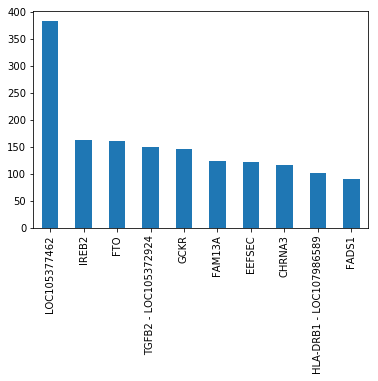

In [18]:
plt.show()

Μπορούμε να διαγράψουμε ένα πεδίο:

In [19]:
gwas = gwas.drop('LINK', 1)

Μπορούμε να μετατρέψουμε ένα πεδίο σε ένα άλλο φορμάτ. Π.χ:

In [20]:
gwas['DATE'] = pd.to_datetime(gwas["DATE"]) # Μετατροπή του DATE από string σε datetime

Τώρα μπορούμε να κάνουμε sort τα δεδομένα μας με βάση το DATE:

In [21]:
gwas_date_sorted = gwas.sort_values('DATE')

Και μπορούμε να κάνουμε plot όλα τα p-values με βάση το DATE που έγιναν publish

In [22]:
gwas_date_sorted['P-VALUE'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

Τι έγινε εδώ;

In [23]:
set([type(x) for x in gwas_date_sorted['P-VALUE']])

{float, str}

Κάποια p-values είναι str και κάποια float! Ποια είναι strings? Ας προσπαθήσουμε να τα μετατρέψουμε όλα σε numberic:

In [24]:
pd.to_numeric(gwas_date_sorted['P-VALUE'])

ValueError: Unable to parse string "2E-1449" at position 35122

Αποτυχία. Ας του πούμε να βάλει NaN values όπου η μετατροπή αποτυγχάνει:

In [25]:
pd.to_numeric(gwas_date_sorted['P-VALUE'], errors='coerce')

274      4.000000e-08
273      8.000000e-06
272      1.000000e-10
271      2.000000e-06
270      2.000000e-06
269      7.000000e-06
268      8.000000e-12
408      5.000000e-10
266      2.000000e-06
267      6.000000e-06
336      6.000000e-08
409      2.000000e-34
265      3.000000e-06
410      9.000000e-06
264      6.000000e-06
262      3.000000e-06
261      2.000000e-06
260      7.000000e-07
263      5.000000e-06
411      2.000000e-18
259      2.000000e-12
747      1.000000e-06
258      4.000000e-07
41851    3.000000e-15
256      1.000000e-12
257      9.000000e-13
414      1.000000e-39
413      6.000000e-18
412      2.000000e-14
324      2.000000e-06
             ...     
64151    7.000000e-09
64152    2.000000e-08
64153    4.000000e-11
64154    3.000000e-09
64155    3.000000e-13
64148    7.000000e-13
64138    3.000000e-08
64139    2.000000e-09
64136    3.000000e-10
64120    9.000000e-09
64121    1.000000e-09
64122    9.000000e-11
64078    7.000000e-07
64124    1.000000e-08
64125    6

Ωραία ας αντικαταστήσουμε τώρα το παλιό με το νέο πεδίο:

In [26]:
gwas_date_sorted['P-VALUE'] = pd.to_numeric(gwas_date_sorted['P-VALUE'], errors='coerce')

Τώρα μπορούμε να δούμε πoιες γραμμή είναι NaN

In [27]:
gwas_date_sorted[gwas_date_sorted['P-VALUE'].isnull()]

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
37312,2016-12-01,26910538,Choi SH,2016-02-24,PLoS Genet,Six Novel Loci Associated with Circulating VEG...,Vascular endothelial growth factor levels,"9541 European ancestry individuals, 1,115 Cile...","2,141 European ancestry individuals, 659 Sorbi...",6p21.1,...,intergenic_variant,1.0,0.46,NaN,1448.69897,NaN,0.64,[0.62-0.66] unit decrease,"Affymetrix, Illumina [6705861] (imputed)",N


Μία γραμμή δημιουργούσε αυτό το πρόβλημα. Ας τη βγάλουμε:

In [28]:
gwas_date_sorted = gwas_date_sorted[~gwas_date_sorted['P-VALUE'].isnull()]

Τώρα μπορούμε να κάνουμε το plot:

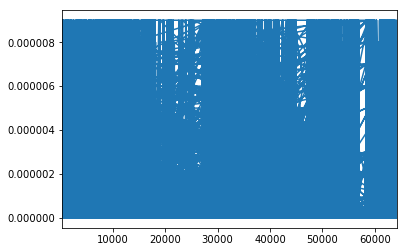

In [29]:
gwas_date_sorted['P-VALUE'].plot()
plt.show()

Τι είναι αυτό καλέ; 
Από default στον Χ άξονα βάζει το index του dataframe:

In [30]:
gwas_date_sorted.index

Int64Index([  274,   273,   272,   271,   270,   269,   268,   408,   266,
              267,
            ...
            64131, 64132, 64133, 64134, 64135, 64128, 64123, 64032, 64031,
            64234],
           dtype='int64', length=64238)

Το index είναι ένα μοναδικό στοιχείο που χαρακτηρίζει κάθε γραμμή. Από default περιέχει τον άυξων αριθμό της γραμμής στο CSV αρχείο. Μπορούμε όμως να αλλάξουμε το index:

In [31]:
gwas_date_sorted2 = gwas_date_sorted.set_index(gwas_date_sorted['DATE'])

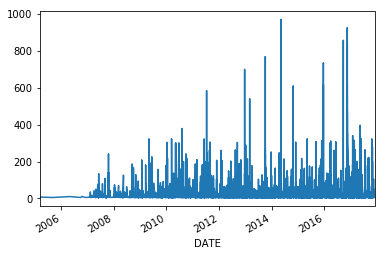

In [32]:
gwas_date_sorted2['PVALUE_MLOG'].plot()
plt.show()

Παρατηρούμε ότι όσο περνάει ο χρόνος. Οι GWAS έρευνες που γίνονται έχουν πιο χαμηλό p-value.

Μπορούμε να φτιάξουμε ένα νέα field μέσω του index

In [33]:
gwas_date_sorted2['YEAR'] = gwas_date_sorted2.index.year

Μπορούμε επίσης να "γκρουπάρουμε" όλες τις γραμμές ανάλογα με τις τιμές ενός πεδίου:

In [34]:
gwas_date_sorted2.groupby('YEAR').aggregate('count')

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
YEAR,,,,,,,,,,,,,,,,,,,,,
2005,2,2,2,2,2,2,2,2,1,2,...,2,2,2,2,2,0,2,2,2,2
2006,8,8,8,8,8,8,8,8,4,8,...,8,8,7,8,8,0,6,6,8,8
2007,440,440,440,440,440,440,440,440,196,439,...,439,437,440,440,440,186,224,224,440,440
2008,977,977,977,977,977,977,977,977,627,974,...,974,972,977,977,977,217,677,709,977,977
2009,1390,1390,1390,1390,1390,1390,1390,1390,831,1387,...,1387,1383,1387,1390,1390,481,1096,1093,1390,1390
2010,2582,2582,2582,2582,2582,2582,2582,2582,1256,2574,...,2574,2580,2552,2582,2582,704,2025,2029,2582,2582
2011,2602,2602,2602,2602,2602,2602,2602,2602,1476,2578,...,2578,2584,2481,2602,2602,721,2129,2114,2602,2602
2012,4404,4404,4404,4404,4404,4404,4404,4404,1608,4354,...,4356,4318,4245,4404,4404,2629,3371,3389,4404,4404
2013,5551,5551,5551,5551,5551,5551,5551,5551,2277,5497,...,5497,5486,5025,5551,5551,2432,4657,4649,5551,5551


Το aggregate εφαρμόζει μία συνάρτηση σε κάθε ένα group ξεχωριστά. Υπάρχουν πολλές built-in συναρτήσεις όπως οι count, mean, median, sum, min, max. 

Π.χ: πλοτάρουμε το πλήθος των entries ανά χρόνο

In [35]:
gwas_date_sorted2.groupby('YEAR').aggregate('count')['JOURNAL'].plot()

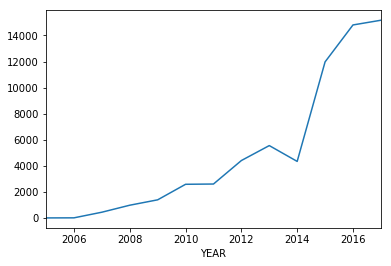

In [36]:
plt.show()

Τυπώνουμε όλες τις γραμμές που έχουν MAPPED_GENE το BRCA2 και έχουν p-value<0.0000001

In [37]:
gwas_date_sorted2[(gwas_date_sorted2["MAPPED_GENE"] == "BRCA2") & (gwas_date_sorted2['P-VALUE']< 0.000000001)]

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,...,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,YEAR
DATE,,,,,,,,,,,,,,,,,,,,,
2013-10-06,2014-05-12,24097068,Willer CJ,2013-10-06,Nat Genet,Discovery and refinement of loci associated wi...,LDL cholesterol,"94,595 European ancestry individuals","93,982 European ancestry individuals",13q13.1,...,0.0,0.48,2.000000e-11,10.698970,NaN,0.024000,[NR] unit increase,NR [NR] (imputed),N,2013
2014-06-01,2015-01-21,24880342,Wang Y,2014-06-01,Nat Genet,Rare variants of large effect in BRCA2 and CHE...,Lung cancer,"3,442 European ancestry adenocarcinoma cases, ...","3,589 European ancestry adenocarcinoma cases, ...",13q13.1,...,0.0,0.0105,5.000000e-20,19.301030,(Squamous cell carcinoma),2.470000,[2.03-3.00],Illumina [8900000] (imputed),N,2014
2014-06-01,2015-01-21,24880342,Wang Y,2014-06-01,Nat Genet,Rare variants of large effect in BRCA2 and CHE...,Lung cancer,"3,442 European ancestry adenocarcinoma cases, ...","3,589 European ancestry adenocarcinoma cases, ...",13q13.1,...,0.0,0.011,2.000000e-19,18.698970,(All lung cancer),1.830000,[1.61-2.09],Illumina [8900000] (imputed),N,2014
2016-04-20,2017-02-03,27197191,Fehringer G,2016-04-20,Cancer Res,"Cross-cancer genome-wide analysis of lung, ova...",Cancer,"5,020 European ancestry lung cancer cases, 3,7...",NaN,13q13.1,...,0.0,NR,8.000000e-12,11.096910,NaN,1.600000,[NR],"Affymetrix, Illumina [9916564] (imputed)",N,2016
2016-04-20,2017-02-03,27197191,Fehringer G,2016-04-20,Cancer Res,"Cross-cancer genome-wide analysis of lung, ova...",Cancer (pleiotropy),"5,020 European ancestry lung cancer cases, 3,7...",NaN,13q13.1,...,0.0,NR,5.000000e-10,9.301030,(subset analysis),NaN,NaN,"Affymetrix, Illumina [9916564] (imputed)",N,2016
2017-02-21,2017-06-26,28334899,Spracklen CN,2017-02-21,Hum Mol Genet,Association analyses of East Asian individuals...,LDL cholesterol levels,"32,285 East Asian ancestry individuals, 173,08...","8,478 Chinese ancestry individuals",13q13.1,...,0.0,0.462,5.000000e-14,13.301030,(Trans-ethnic initial),0.024300,[0.017-0.032] unit increase (EA Beta value),"Affymetrix, Illumina [~ 1900000] (imputed)",N,2017
2017-06-12,2017-09-18,28604730,McKay JD,2017-06-12,Nat Genet,Large-scale association analysis identifies ne...,Lung cancer,"29,266 European ancestry cases, 56,450 Europea...",NaN,13q13.1,...,0.0,0.010904125,6.000000e-16,15.221849,NaN,1.603498,[1.430101714-1.797917759],Illumina [10439017] (imputed),N,2017
2017-06-12,2017-09-18,28604730,McKay JD,2017-06-12,Nat Genet,Large-scale association analysis identifies ne...,Squamous cell lung carcinoma,"7,426 European ancestry cases, 55,627 European...",NaN,13q13.1,...,0.0,0.010732274,1.000000e-15,15.000000,NaN,2.125263,[1.768050378-2.554646438],Illumina [10439017] (imputed),N,2017
2017-10-23,2017-12-19,29058716,Milne RL,2017-10-23,Nat Genet,Identification of ten variants associated with...,Breast cancer (estrogen-receptor negative),"14,135 European ancestry cases, 58,126 Europea...","7,333 European ancestry cases, 42,468 European...",13q13.1,...,0.0,0.01,2.000000e-13,12.698970,NaN,1.580000,[1.35-1.84] (Oncoarray),Illumina [~ 11500000] (imputed),N,2017


In [38]:
g=gwas_date_sorted2

Όλες οι γραμμές που έχουν χρωμόσωμα που ανοίκει στον πίνακα ['1', '2', ... '22', 'Χ','Υ' ]

In [39]:
g3 = g[g["CHR_ID"].isin([str(x) for x in range(1,23)] + ["X", "Y"])]

Πόσες γραμμές ανά χρωμόσωμα έχουμε;

In [40]:
g3["CHR_ID"].value_counts()

6     6067
1     5529
2     5039
3     4122
4     3554
5     3485
11    3348
7     3035
12    2912
8     2791
10    2755
15    2534
9     2512
16    2318
19    2177
17    2130
14    1640
20    1440
13    1405
18    1278
22    1091
21     550
X      372
Y        2
Name: CHR_ID, dtype: int64

Ποιο είναι το πιο χαμηλό p-value ανά χρωμόσωμα;

In [41]:
g3.groupby("CHR_ID")["P-VALUE"].aggregate('min')

CHR_ID
1      0.000000e+00
10     0.000000e+00
11     0.000000e+00
12     0.000000e+00
13    9.000000e-256
14    2.000000e-188
15    1.000000e-300
16     0.000000e+00
17    2.000000e-298
18    3.000000e-200
19     0.000000e+00
2      0.000000e+00
20    2.000000e-200
21    4.000000e-104
22    5.000000e-178
3      0.000000e+00
4      0.000000e+00
5     5.000000e-274
6      0.000000e+00
7      0.000000e+00
8     5.000000e-217
9     1.000000e-312
X     1.000000e-247
Y      9.000000e-07
Name: P-VALUE, dtype: float64

Μπορούμε να σώσουμε ένα pandas αντικείμενο σε csv (ή κάποιο άλλο φορμάτ):

In [42]:
g3.to_csv('results.csv')

Και σε excel. Για να γίνει αυτό χρειάζεται το πακέτο xlwt:

In [44]:
!pip install xlwt

    100% |████████████████████████████████| 102kB 546kB/s a 0:00:01


In [45]:
g3.to_excel('results.xls')

Ένα άλλος παράδειγμα:
Από όλα τα studies που έχουν το Breast στο DISEASE/TRAIN και έχουν PVALUE<10^-10, βρες το χρωμόσωμα που έχει τα περισσότερα studies

In [46]:
g3[ (g3["DISEASE/TRAIT"].str.contains('Breast')) & (g3["PVALUE_MLOG"]>10)].groupby("CHR_ID")['JOURNAL'].aggregate('count').idxmax()

'5'

Αναμενόμενο αφού το BRCA2 βρίσκεται στο χρωμόσωμα 5

Να και ένα pie-chart με την κατανομή των studies ανά χρωμόσωμα:

**ΠΡΟΣΟΧΗ!** Ποτέ μην χρησιμοποιείται pie-chart σε (σοβαρές) ανοφορές/paper. Διαβάστε [αυτό](http://www.businessinsider.com/pie-charts-are-the-worst-2013-6) και [αυτό](https://blog.funnel.io/why-we-dont-use-pie-charts-and-some-tips-on-better-data-visualizations).

In [47]:
g3[ (g3["DISEASE/TRAIT"].str.contains('Breast')) & (g3["PVALUE_MLOG"]>10)].groupby("CHR_ID")['CHR_ID'].aggregate('count').plot(kind='pie')

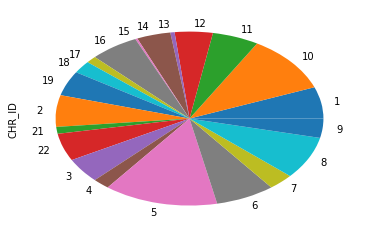

In [48]:
plt.show()

Μερικά ακόμα παραδείγματα: 

*Ποιος είναι ο ερευνητής που έχει τις περισσότερες δημοσιεύσεις στο Nature Genetics;*

In [50]:
g3[g3['JOURNAL'] == 'Nat Genet'].groupby(
    'FIRST AUTHOR').aggregate('count')['PUBMEDID'].idxmax()

'Pickrell JK'

*Ποιο region περιέχει τις περισσότερες μελέτες σχετικά με καρκίνο;*

In [51]:
g3[g3['DISEASE/TRAIT'].str.contains('cancer', case=False)].groupby(
    'REGION').aggregate('count')['PUBMEDID'].idxmax()

'8q24.21'

*Ποιος είναι ο μέσος όρος και το median του allele_frequency για όλα τα variants που ανακαλύπτοντε κάθε χρόνο;*

In [53]:
# Μετατρέπουμε το ALLELE FREQUENCY σε numeric (από string)
g3['RISK ALLELE FREQUENCY'] = pd.to_numeric(g3['RISK ALLELE FREQUENCY'], errors='coerce')

# Ο Μέσος όρος. ΠΡΟΣΟΧΗ! Αφαιρούμε όσα έχουν null RISK ALLELE FREQUENCY 
g3[~g3['RISK ALLELE FREQUENCY'].isnull()].groupby('YEAR')['RISK ALLELE FREQUENCY'].aggregate('mean')

/Users/alexandroskanterakis/anaconda3/envs/arkalos/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


YEAR
2006    0.370000
2007    0.415852
2008    0.391309
2009    0.364374
2010    0.359003
2011    0.389704
2012    0.332810
2013    0.413206
2014    0.425324
2015    0.508952
2016    0.366965
2017    0.387201
Name: RISK ALLELE FREQUENCY, dtype: float64

In [54]:
# Το median
g3[~g3['RISK ALLELE FREQUENCY'].isnull()].groupby('YEAR')['RISK ALLELE FREQUENCY'].aggregate('median')

YEAR
2006    0.370000
2007    0.400000
2008    0.350000
2009    0.320000
2010    0.330000
2011    0.350000
2012    0.290000
2013    0.378664
2014    0.400000
2015    0.494200
2016    0.336300
2017    0.359500
Name: RISK ALLELE FREQUENCY, dtype: float64

Και τα δυο μαζί:

In [81]:
g4 = g3[~g3['RISK ALLELE FREQUENCY'].isnull()].groupby('YEAR')['RISK ALLELE FREQUENCY'].aggregate(['mean', 'median'])
g4

,mean,median
YEAR,,
2006,0.370000,0.370000
2007,0.415852,0.400000
2008,0.391309,0.350000
2009,0.364374,0.320000
2010,0.359003,0.330000
2011,0.389704,0.350000
2012,0.332810,0.290000
2013,0.413206,0.378664
2014,0.425324,0.400000


Ας κάνουμε ένα scatter plot με τον x να είναι το YEAR και το y να είναι τα mean και median

In [71]:
g4.plot(style='.')

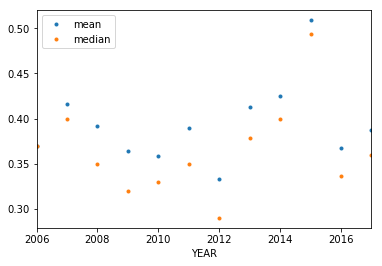

In [72]:
plt.show()

Και ένα scatter plot με το χ να είναι το mean και το y το median:

In [78]:
g4.plot.scatter(x='mean', y='median')

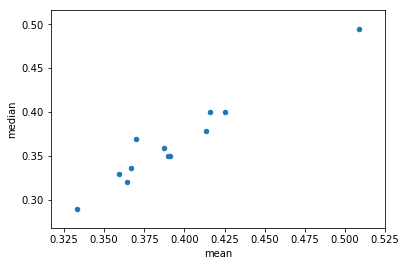

In [79]:
plt.show()

Ένας (από τους πολλούς) τρόπους για να φτιάξετε ένα data frame από δικά σας δεδομένα είναι:

In [31]:
data={"A": [1,2,3,4], "B": ["aa", "bb", "cc", "dd"], "C": [True, False, False, True]}
df = pd.DataFrame(data)
df

,A,B,C
0,1,aa,True
1,2,bb,False
2,3,cc,False
3,4,dd,True


Πως επιλέγουμε συγκεκριμένες γραμμές

In [7]:
df.iloc[:2]

,A,B,C
0,1,aa,True
1,2,bb,False


In [8]:
df[:2]

,A,B,C
0,1,aa,True
1,2,bb,False


Πάρε μόνο τις γραμμές 2 και 4

In [13]:
df.loc[[1,3]]

,A,B,C
1,2,bb,False
3,4,dd,True


Μετατροπη του DataFrame σε dictionary:

In [16]:
df.to_dict('index') # Αυτό φαίνεται πιο.. κατανοητό..

{0: {'A': 1, 'B': 'aa', 'C': True},
 1: {'A': 2, 'B': 'bb', 'C': False},
 2: {'A': 3, 'B': 'cc', 'C': False},
 3: {'A': 4, 'B': 'dd', 'C': True}}

In [15]:
df.to_dict()

{'A': {0: 1, 1: 2, 2: 3, 3: 4},
 'B': {0: 'aa', 1: 'bb', 2: 'cc', 3: 'dd'},
 'C': {0: True, 1: False, 2: False, 3: True}}

Προσθήκη νέας κολόνας από συνδοιασμό άλλω κολόνων:

In [32]:
df['D'] = df['A'].apply(lambda x:x**2)
df

,A,B,C,D
0,1,aa,True,1
1,2,bb,False,4
2,3,cc,False,9
3,4,dd,True,16


In [33]:
df['E'] = df['C'].map({True: 'Male', False: 'Female'})
df

,A,B,C,D,E
0,1,aa,True,1,Male
1,2,bb,False,4,Female
2,3,cc,False,9,Female
3,4,dd,True,16,Male


Αλλαγή του ονόματος των στηλών:

In [34]:
df = df.rename(index=str, columns={'C': 'Is Male', 'B': 'City'})
df

,A,City,Is Male,D,E
0,1,aa,True,1,Male
1,2,bb,False,4,Female
2,3,cc,False,9,Female
3,4,dd,True,16,Male


Αλλαγή του ονόματων του index

In [35]:
df.index = df.index.rename('Εγγραφές')
df

,A,City,Is Male,D,E
Εγγραφές,,,,,
0,1,aa,True,1,Male
1,2,bb,False,4,Female
2,3,cc,False,9,Female
3,4,dd,True,16,Male
